In [19]:
print("A")
import sys
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

A


In [20]:
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data


In [21]:
X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)
print(X_train.shape)

(60, 3)


In [22]:

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

history = autoencoder.fit(X_train, X_train, epochs=20)

coding = encoder.predict(X_train)


Epoch 1/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3131
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2919
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2724
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2553
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2375
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2207
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2049
Epoch 8/20
2/2 [==============================] - 0s 2ms/step 

In [23]:
codings = encoder.predict(X_train)
print(codings.shape)

(60, 2)


Saving figure linear_autoencoder_pca_plot


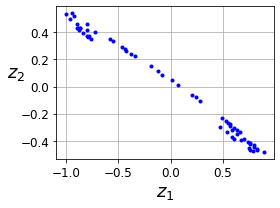

In [24]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()